In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [26]:
data2 = loadmat('ex7data2.mat')
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [27]:
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i, :] - centroids[j, :]) **2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
                
    return idx

In [28]:
X = data2['X']
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = find_closest_centroids(X, initial_centroids)
idx[0:3]

array([0., 2., 1.])

In [29]:
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i, :] = (np.sum(X[indices, :], axis=1)/len(indices[0])).ravel()
    
    return centroids 

In [30]:
compute_centroids(X, idx, 3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [31]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
        
    return idx, centroids

In [32]:
idx, centroids = run_k_means(X, initial_centroids, 10)

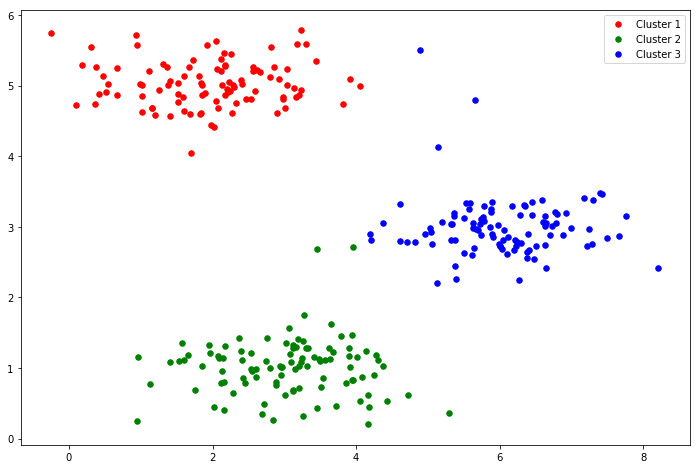

In [33]:
cluster1 = X[np.where(idx == 0)[0], :]
cluster2 = X[np.where(idx == 1)[0], :]
cluster3 = X[np.where(idx == 2)[0], :]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()

In [34]:
def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
    
    for i in range(k):
        centroids[i, :] = X[idx[i], :]
        
    return centroids

In [35]:
init_centroids(X, 3)

array([[5.02432984, 2.98683179],
       [5.63176103, 3.04758747],
       [6.92721968, 3.19960026]])

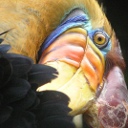

In [36]:
from IPython.display import Image
Image(filename='bird_small.png')

In [37]:
image_data = loadmat('bird_small.mat')
image_data

{'A': array([[[219, 180, 103],
         [230, 185, 116],
         [226, 186, 110],
         ...,
         [ 14,  15,  13],
         [ 13,  15,  12],
         [ 12,  14,  12]],
 
        [[230, 193, 119],
         [224, 192, 120],
         [226, 192, 124],
         ...,
         [ 16,  16,  13],
         [ 14,  15,  10],
         [ 11,  14,   9]],
 
        [[228, 191, 123],
         [228, 191, 121],
         [220, 185, 118],
         ...,
         [ 14,  16,  13],
         [ 13,  13,  11],
         [ 11,  15,  10]],
 
        ...,
 
        [[ 15,  18,  16],
         [ 18,  21,  18],
         [ 18,  19,  16],
         ...,
         [ 81,  45,  45],
         [ 70,  43,  35],
         [ 72,  51,  43]],
 
        [[ 16,  17,  17],
         [ 17,  18,  19],
         [ 20,  19,  20],
         ...,
         [ 80,  38,  40],
         [ 68,  39,  40],
         [ 59,  43,  42]],
 
        [[ 15,  19,  19],
         [ 20,  20,  18],
         [ 18,  19,  17],
         ...,
         [ 65,  43,  39

In [38]:
A = image_data['A']
A.shape

(128, 128, 3)

In [39]:
# Normalizing values
A = A/255

# Reshaping
X = np.reshape(A, (A.shape[0]*A.shape[1], A.shape[2]))
X.shape

(16384, 3)

In [41]:
# Random initialization
initial_centroids = init_centroids(X, 16)

#Running algo
idx, centroids = run_k_means(X, initial_centroids, 10)

#closest centroids
idx = find_closest_centroids(X, centroids)

# mapping pixels to centroid vaue
X_recovered = centroids[idx.astype(int), :]
X_recovered.shape

(16384, 3)

In [42]:
# Reshape to original
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
X_recovered.shape

(128, 128, 3)

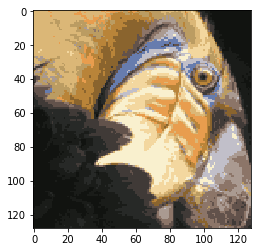

In [43]:
plt.imshow(X_recovered)

## Principal Component Analysis

In [45]:
# Applying PCA to a simple 2D dataset 

data1 = loadmat('ex7data1.mat')
data1

{'X': array([[3.38156267, 3.38911268],
        [4.52787538, 5.8541781 ],
        [2.65568187, 4.41199472],
        [2.76523467, 3.71541365],
        [2.84656011, 4.17550645],
        [3.89067196, 6.48838087],
        [3.47580524, 3.63284876],
        [5.91129845, 6.68076853],
        [3.92889397, 5.09844661],
        [4.56183537, 5.62329929],
        [4.57407171, 5.39765069],
        [4.37173356, 5.46116549],
        [4.19169388, 4.95469359],
        [5.24408518, 4.66148767],
        [2.8358402 , 3.76801716],
        [5.63526969, 6.31211438],
        [4.68632968, 5.6652411 ],
        [2.85051337, 4.62645627],
        [5.1101573 , 7.36319662],
        [5.18256377, 4.64650909],
        [5.70732809, 6.68103995],
        [3.57968458, 4.80278074],
        [5.63937773, 6.12043594],
        [4.26346851, 4.68942896],
        [2.53651693, 3.88449078],
        [3.22382902, 4.94255585],
        [4.92948801, 5.95501971],
        [5.79295774, 5.10839305],
        [2.81684824, 4.81895769],
        [

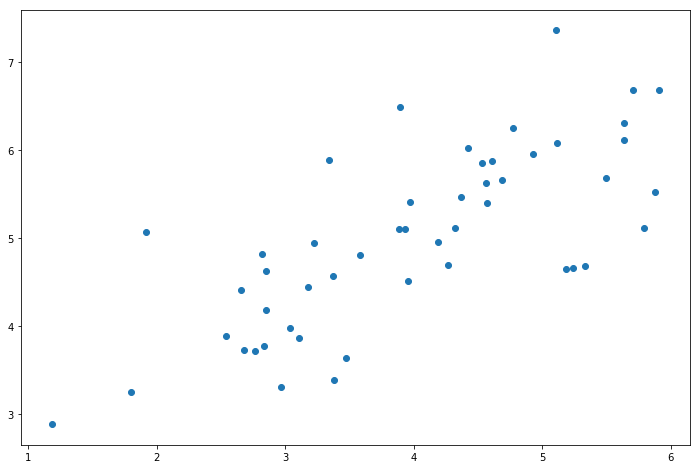

In [47]:
X = data1['X']
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:, 0], X[:, 1])

 The algorithm for PCA is fairly simple. After ensuring that the data is normalized, the output is simply the singular value decomposition of the covariance matrix of the original data.

In [48]:
def pca(X):
    #Normalization
    X = (X - X.mean())/X.std()
    
    #Covariance
    X = np.matrix(X)
    cov = (X.T*X)/X.shape[0]
    
    #perform SVD
    U, S, V = np.linalg.svd(cov)
    
    return U, S, V

In [49]:
U, S, V = pca(X)
U, S, V

(matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]),
 array([1.43584536, 0.56415464]),
 matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]))

In [50]:
def project_data(X, U, k):
    U_reduced = U[:, :k]
    return np.dot(X, U_reduced)

In [51]:
Z = project_data(X, U, 1)
Z

matrix([[-4.74689738],
        [-7.15889408],
        [-4.79563345],
        [-4.45754509],
        [-4.80263579],
        [-7.04081342],
        [-4.97025076],
        [-8.75934561],
        [-6.2232703 ],
        [-7.04497331],
        [-6.91702866],
        [-6.79543508],
        [-6.3438312 ],
        [-6.99891495],
        [-4.54558119],
        [-8.31574426],
        [-7.16920841],
        [-5.08083842],
        [-8.54077427],
        [-6.94102769],
        [-8.5978815 ],
        [-5.76620067],
        [-8.2020797 ],
        [-6.23890078],
        [-4.37943868],
        [-5.56947441],
        [-7.53865023],
        [-7.70645413],
        [-5.17158343],
        [-6.19268884],
        [-6.24385246],
        [-8.02715303],
        [-4.81235176],
        [-7.07993347],
        [-5.45953289],
        [-7.60014707],
        [-4.39612191],
        [-7.82288033],
        [-3.40498213],
        [-6.54290343],
        [-7.17879573],
        [-5.22572421],
        [-4.83081168],
        [-7

In [59]:
def recover_data(Z, U, k):
    U_reduced = U[:, :k]
    return np.dot(Z, U_reduced.T)

In [65]:
X_recovered = recover_data(Z, U, 1)
print(X_recovered.shape)
X_recovered

(50, 2)


matrix([[3.76152442, 2.89550838],
        [5.67283275, 4.36677606],
        [3.80014373, 2.92523637],
        [3.53223661, 2.71900952],
        [3.80569251, 2.92950765],
        [5.57926356, 4.29474931],
        [3.93851354, 3.03174929],
        [6.94105849, 5.3430181 ],
        [4.93142811, 3.79606507],
        [5.58255993, 4.29728676],
        [5.48117436, 4.21924319],
        [5.38482148, 4.14507365],
        [5.02696267, 3.8696047 ],
        [5.54606249, 4.26919213],
        [3.60199795, 2.77270971],
        [6.58954104, 5.07243054],
        [5.681006  , 4.37306758],
        [4.02614513, 3.09920545],
        [6.76785875, 5.20969415],
        [5.50019161, 4.2338821 ],
        [6.81311151, 5.24452836],
        [4.56923815, 3.51726213],
        [6.49947125, 5.00309752],
        [4.94381398, 3.80559934],
        [3.47034372, 2.67136624],
        [4.41334883, 3.39726321],
        [5.97375815, 4.59841938],
        [6.10672889, 4.70077626],
        [4.09805306, 3.15455801],
        [4.907

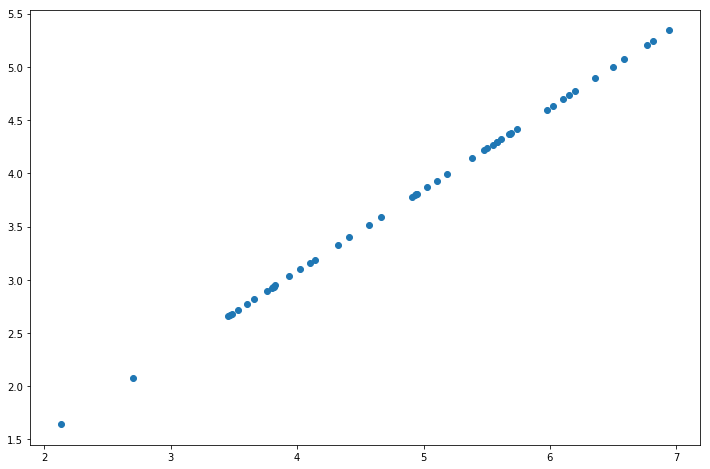

In [67]:
fig, ax = plt.subplots(figsize=(12,8))
X0_recovered = np.asarray(X_recovered[:, 0])
X1_recovered = np.asarray(X_recovered[:, 1])
ax.scatter(X0_recovered, X1_recovered)